## K Means Clustering

- Exploring clustering models using dummy dataset and visualize
- What number of cluster is the best?
- Agglomerative clustering
- Hierarchical clustering and visualization of dendogram
- Apply clustering in Iris dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs, make_moons

import warnings
warnings.filterwarnings(action='ignore')

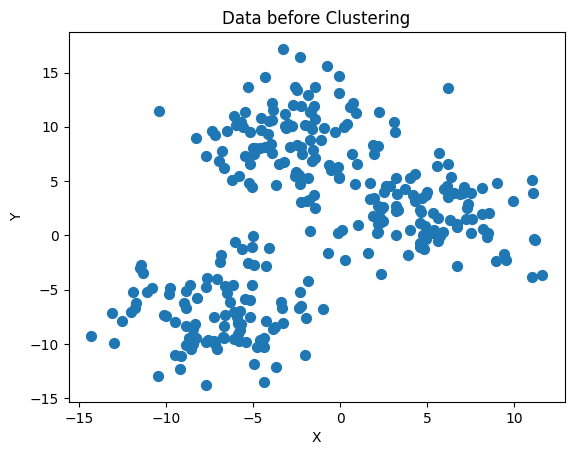

In [2]:
# Generate sample data
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=3.0, random_state=42)
# X, _ = make_moons(n_samples=300, noise=0.03, random_state=42)

# Visualize the data before clustering
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Data before Clustering')
plt.show()


In [3]:
# Perform K-means clustering with K=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Get the cluster centers and labels
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_

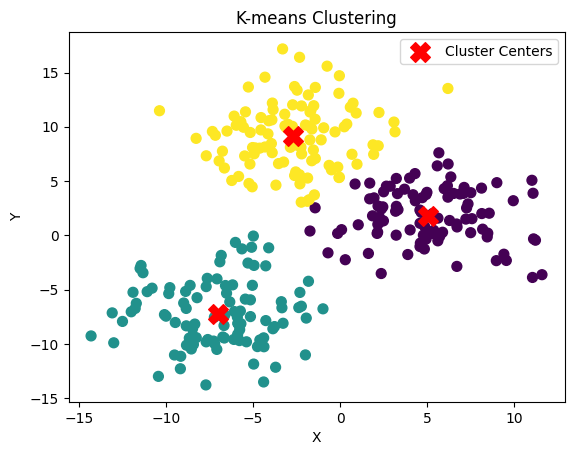

In [4]:
# Visualize the clustered data
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, s=50, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-means Clustering')
plt.legend()
plt.show()

## What number of cluster is the best?

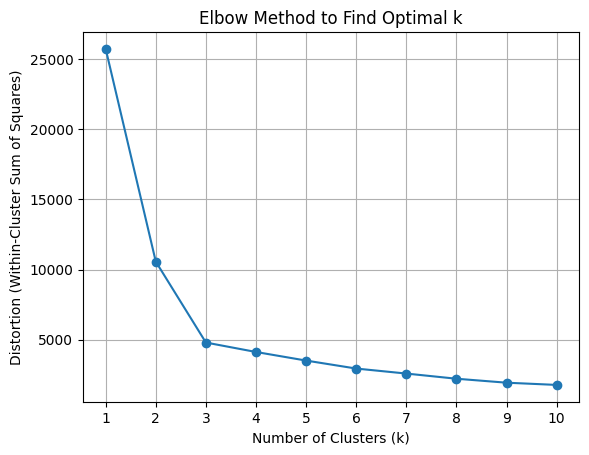

In [5]:
# Calculate distortion for different values of k
ssd = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    ssd.append(kmeans.inertia_)  # Inertia is the within-cluster sum of squares

# Plot the elbow curve
plt.plot(K_range, ssd, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion (Within-Cluster Sum of Squares)')
plt.title('Elbow Method to Find Optimal k')
plt.xticks(K_range)
plt.grid(True)
plt.show()


## Hierarchical Clustering

**Agglomerative Clustering:**

Agglomerative clustering is a technique in machine learning that groups similar data points together to form clusters. It starts by considering each data point as its own cluster and then repeatedly merges the closest clusters until all data points belong to a single cluster or until a desired number of clusters is reached. The result is a hierarchical structure of clusters, showing how smaller clusters are combined to form larger ones.

**Dendrogram:**

A dendrogram is a tree-like diagram used to visualize the hierarchical structure created during agglomerative clustering. It shows the step-by-step merging of clusters. Each data point starts as a leaf, and as the algorithm proceeds, clusters are merged, forming branches in the dendrogram. The height of each branch indicates the similarity between the clusters being merged. Cutting the dendrogram at a certain height allows us to obtain a specific number of clusters.

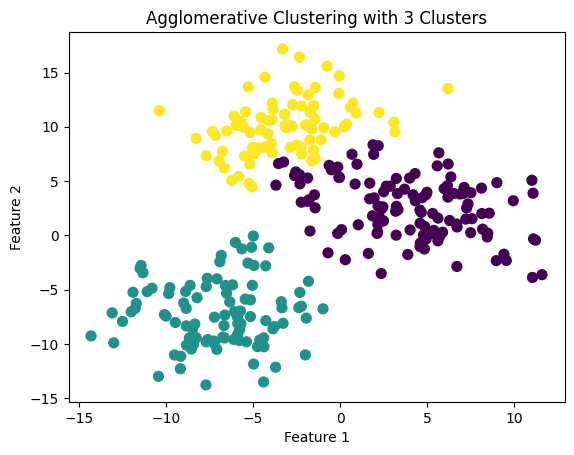

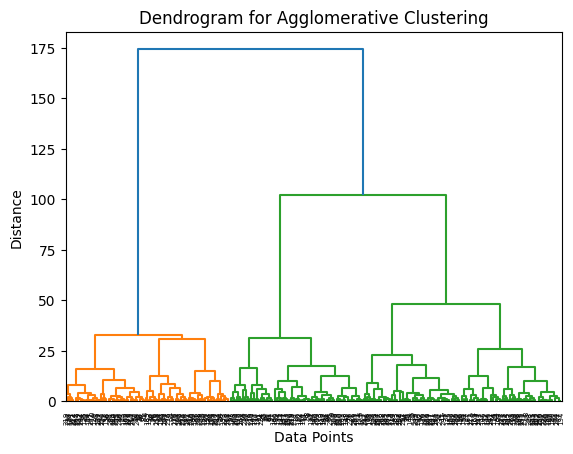

In [6]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform Agglomerative Clustering with desired number of clusters (n_clusters)
n_clusters = 3
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
cluster_labels = agg_clustering.fit_predict(X)

# Visualize the clustered data
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, s=50, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'Agglomerative Clustering with {n_clusters} Clusters')
plt.show()

# Plot the dendrogram to visualize the hierarchical structure
linkage_matrix = linkage(X, method='ward')  # 'ward' linkage minimizes the variance of distances within clusters
dendrogram(linkage_matrix)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Dendrogram for Agglomerative Clustering')
plt.show()


## Applying Clustering in Iris Dataset

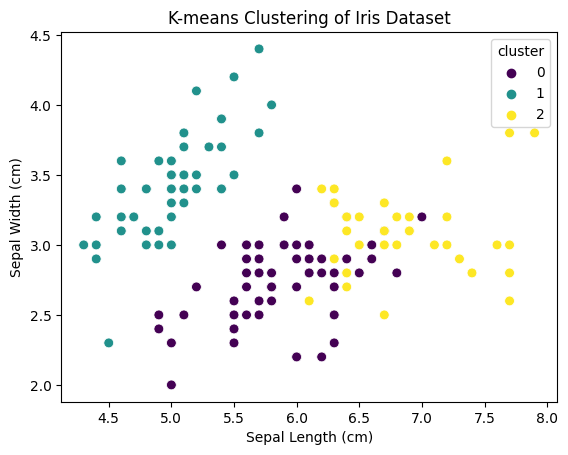

In [9]:
from sklearn.cluster import KMeans

# Load the Iris dataset from seaborn
iris = sns.load_dataset('iris')

X = iris.drop('species', axis=1)

# Perform K-means clustering with K=3
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X)

iris['cluster'] = cluster_labels

# Visualize the clusters
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue='cluster', palette='viridis', s=50)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('K-means Clustering of Iris Dataset')
plt.show()